# Hidden Layers Activation


## Setting up Neural Network


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import backend as K

from keras.datasets import fashion_mnist
from keras import utils
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

nb_classes = 10

In [2]:
# Set dropout rate - fractions of neurons to drop
dropout = 0.5

# Build very simple neural network with 2 hidden layers
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(784,)))
model.add(Dropout(dropout))
model.add(Dense(64, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Prepate the Dataset


In [3]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utils to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

# Split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5 / 6)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualizing example digit


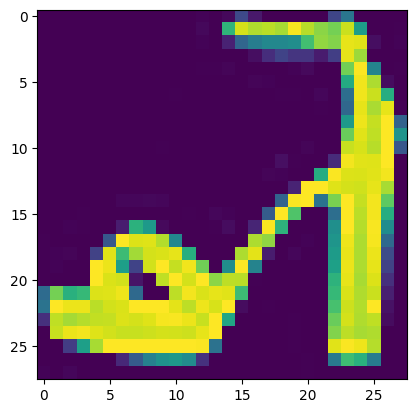

In [4]:
# Show example digit
plt.imshow(X_train[0].reshape(28, 28))

## Model Training


In [5]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.
network_history = model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(X_val, Y_val),
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5909 - loss: 1.1401 - val_accuracy: 0.8232 - val_loss: 0.4910
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.5910 - val_accuracy: 0.8295 - val_loss: 0.4497
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.5080 - val_accuracy: 0.8411 - val_loss: 0.4176
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8338 - loss: 0.4773 - val_accuracy: 0.8512 - val_loss: 0.3997
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.4454 - val_accuracy: 0.8615 - val_loss: 0.3738
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8451 - loss: 0.4323 - val_accuracy: 0.8627 - val_loss: 0.3732
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.4145 - val_accuracy: 0.8636 - val_loss: 0.3655
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8547 - loss: 0.4109 - val_accuracy: 0.

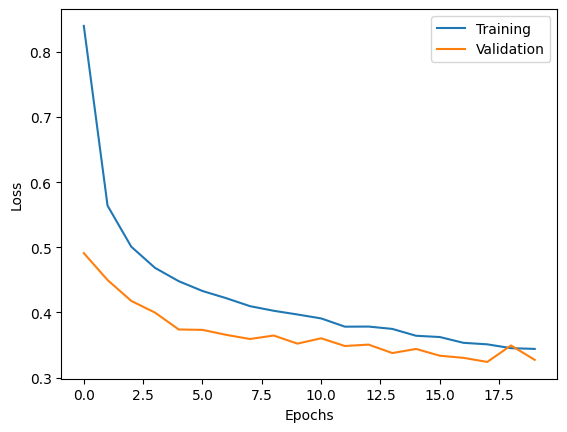

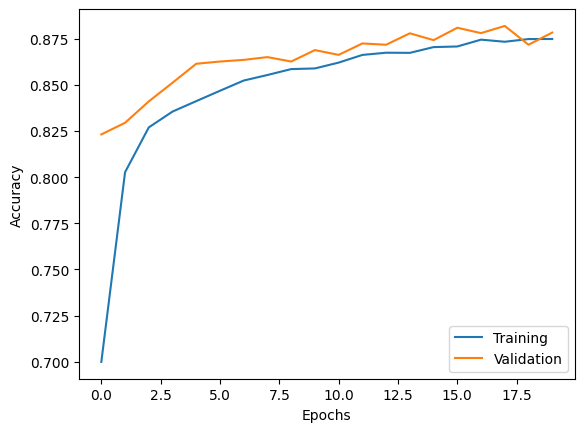

In [6]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(network_history.history["loss"])
    plt.plot(network_history.history["val_loss"])
    plt.legend(["Training", "Validation"])

    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(network_history.history["accuracy"])
    plt.plot(network_history.history["val_accuracy"])
    plt.legend(["Training", "Validation"], loc="lower right")
    plt.show()


# The fit function returns a keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrics for each epoch.
# We can therefore plot the behavior of loss and accuracy during the training phase.
plot_history(network_history)

In [7]:
import tensorflow

# Create a function that takes ONE input and returns THREE outputs
get_outputs = tensorflow.keras.Function(
    inputs=[model.layers[0].input],
    outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output],
)

# Now call with single input
layer1, layer2, layer3 = get_outputs([X_train])
train_ids = [np.arange(len(Y_train))[Y_train[:, i] == 1] for i in range(10)]

In [8]:
test_layer1_output, test_layer2_output, test_layer3_output = get_outputs([X_test])

In [9]:
# 1. Preprocess data for TriMAP
tensorflow.experimental.numpy.experimental_enable_numpy_behavior()
layer1 = np.ascontiguousarray(layer1.astype(np.float32))
layer2 = np.ascontiguousarray(layer2.astype(np.float32))
test_layer1_output = np.ascontiguousarray(test_layer1_output.astype(np.float32))
test_layer2_output = np.ascontiguousarray(test_layer2_output.astype(np.float32))

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


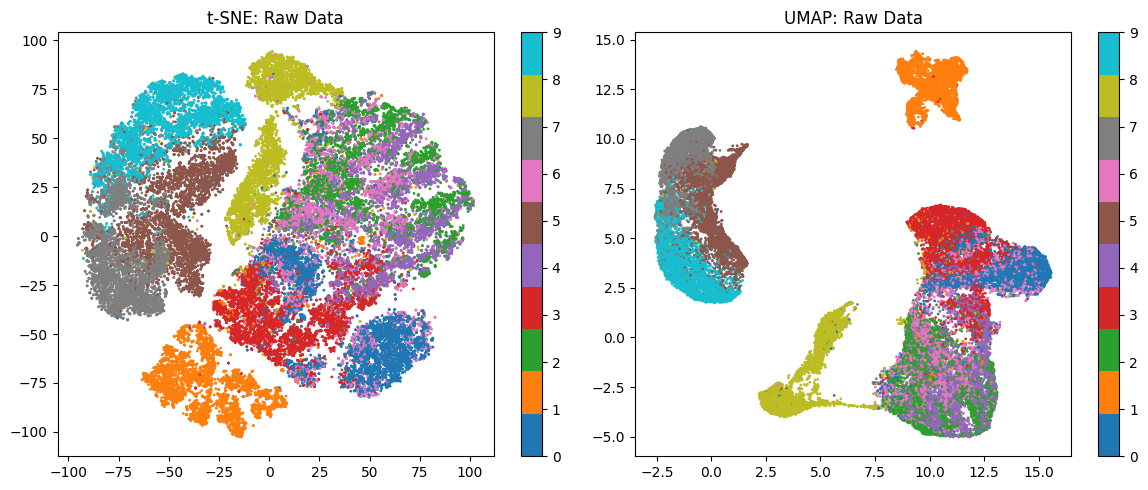

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


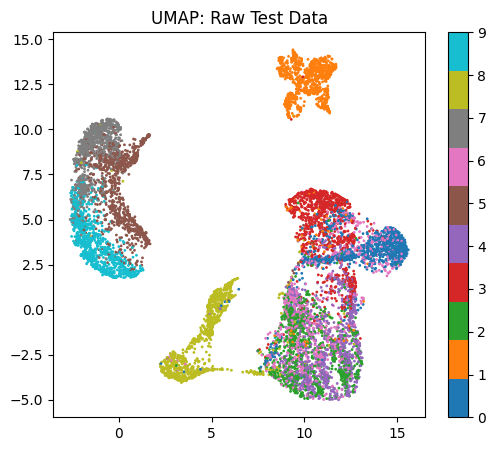

In [10]:
# Import necessary libraries
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
from trimap import TRIMAP

# Apply t-SNE to raw training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Apply UMAP to raw training data
umap_model = UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)

# Visualize the embeddings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    X_train_tsne[:, 0],
    X_train_tsne[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("t-SNE: Raw Data")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(
    X_train_umap[:, 0],
    X_train_umap[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("UMAP: Raw Data")
plt.colorbar()
plt.tight_layout()
plt.show()

X_test_umap = umap_model.transform(X_test)
plt.figure(figsize=(6, 5))
plt.scatter(
    X_test_umap[:, 0], X_test_umap[:, 1], c=np.argmax(Y_test, axis=1), cmap="tab10", s=1
)
plt.title("UMAP: Raw Test Data")
plt.colorbar()
plt.show()

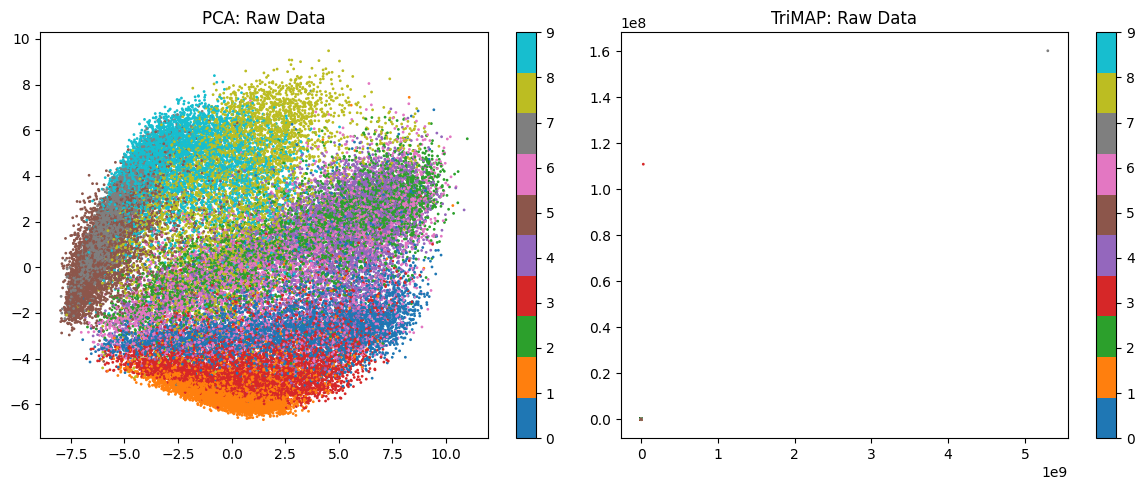

In [11]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

TriMAP_model = TRIMAP()
X_train_trimap = TriMAP_model.fit_transform(X_train)

# Visualize the embeddings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("PCA: Raw Data")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(
    X_train_trimap[:, 0],
    X_train_trimap[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("TriMAP: Raw Data")
plt.colorbar()
plt.tight_layout()
plt.show()

In [20]:
def map_fmnist_labels(label):
    if label == 0:
        return "T-shirt/top"
    elif label == 1:
        return "Trouser"
    elif label == 2:
        return "Pullover"
    elif label == 3:
        return "Dress"
    elif label == 4:
        return "Coat"
    elif label == 5:
        return "Sandal"
    elif label == 6:
        return "Shirt"
    elif label == 7:
        return "Sneaker"
    elif label == 8:
        return "Bag"
    else:
        return "Ankle boot"

In [50]:
hue_order = np.unique(y_train)

fmnist_mapped_labels = list(map(map_fmnist_labels, hue_order))
fmnist_mapped_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [61]:
def visualize_layers(
    layer1_train_embedding,
    layer1_test_embedding,
    layer2_train_embedding,
    layer2_test_embedding,
    method,
    y_train=Y_train,
    y_test=Y_test,
):
    # Visualize the embeddings
    plt.figure(figsize=(14, 14))
    plt.subplot(2, 2, 1)
    plt.scatter(
        layer1_train_embedding[:, 0],
        layer1_train_embedding[:, 1],
        c=np.argmax(y_train, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: First layer training embedding")
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(fmnist_mapped_labels)

    plt.subplot(2, 2, 2)
    plt.scatter(
        layer2_train_embedding[:, 0],
        layer2_train_embedding[:, 1],
        c=np.argmax(y_train, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: Second layer training embedding")
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(fmnist_mapped_labels)

    plt.subplot(2, 2, 3)
    plt.scatter(
        layer1_test_embedding[:, 0],
        layer1_test_embedding[:, 1],
        c=np.argmax(y_test, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: First layer test embedding")
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(fmnist_mapped_labels)

    plt.subplot(2, 2, 4)
    plt.scatter(
        layer2_test_embedding[:, 0],
        layer2_test_embedding[:, 1],
        c=np.argmax(y_test, axis=1),
        label =np.argmax(y_test, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: Second layer test embedding")
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(fmnist_mapped_labels)


    plt.tight_layout()
    plt.show()

In [13]:
methods = {"PCA": {"method": PCA}, "t-SNE": {"method": TSNE}, "UMAP": {"method": UMAP}}

In [ ]:
for method, config in methods.items():
    first_layer_model = config["method"]()
    second_layer_model = config["method"]()

    layer1_train_embedding = first_layer_model.fit_transform(layer1)
    layer2_train_embedding = second_layer_model.fit_transform(layer2)

    if method == "t-SNE" or method == "TriMAP":
        layer1_test_embedding = first_layer_model.fit_transform(test_layer1_output)
        layer2_test_embedding = second_layer_model.fit_transform(test_layer2_output)
    else:
        layer1_test_embedding = first_layer_model.transform(test_layer1_output)
        layer2_test_embedding = second_layer_model.transform(test_layer2_output)

    config["layer1_train_embedding"] = layer1_train_embedding
    config["layer1_test_embedding"] = layer1_test_embedding
    config["layer2_train_embedding"] = layer2_train_embedding
    config["layer2_test_embedding"] = layer2_test_embedding


/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yt

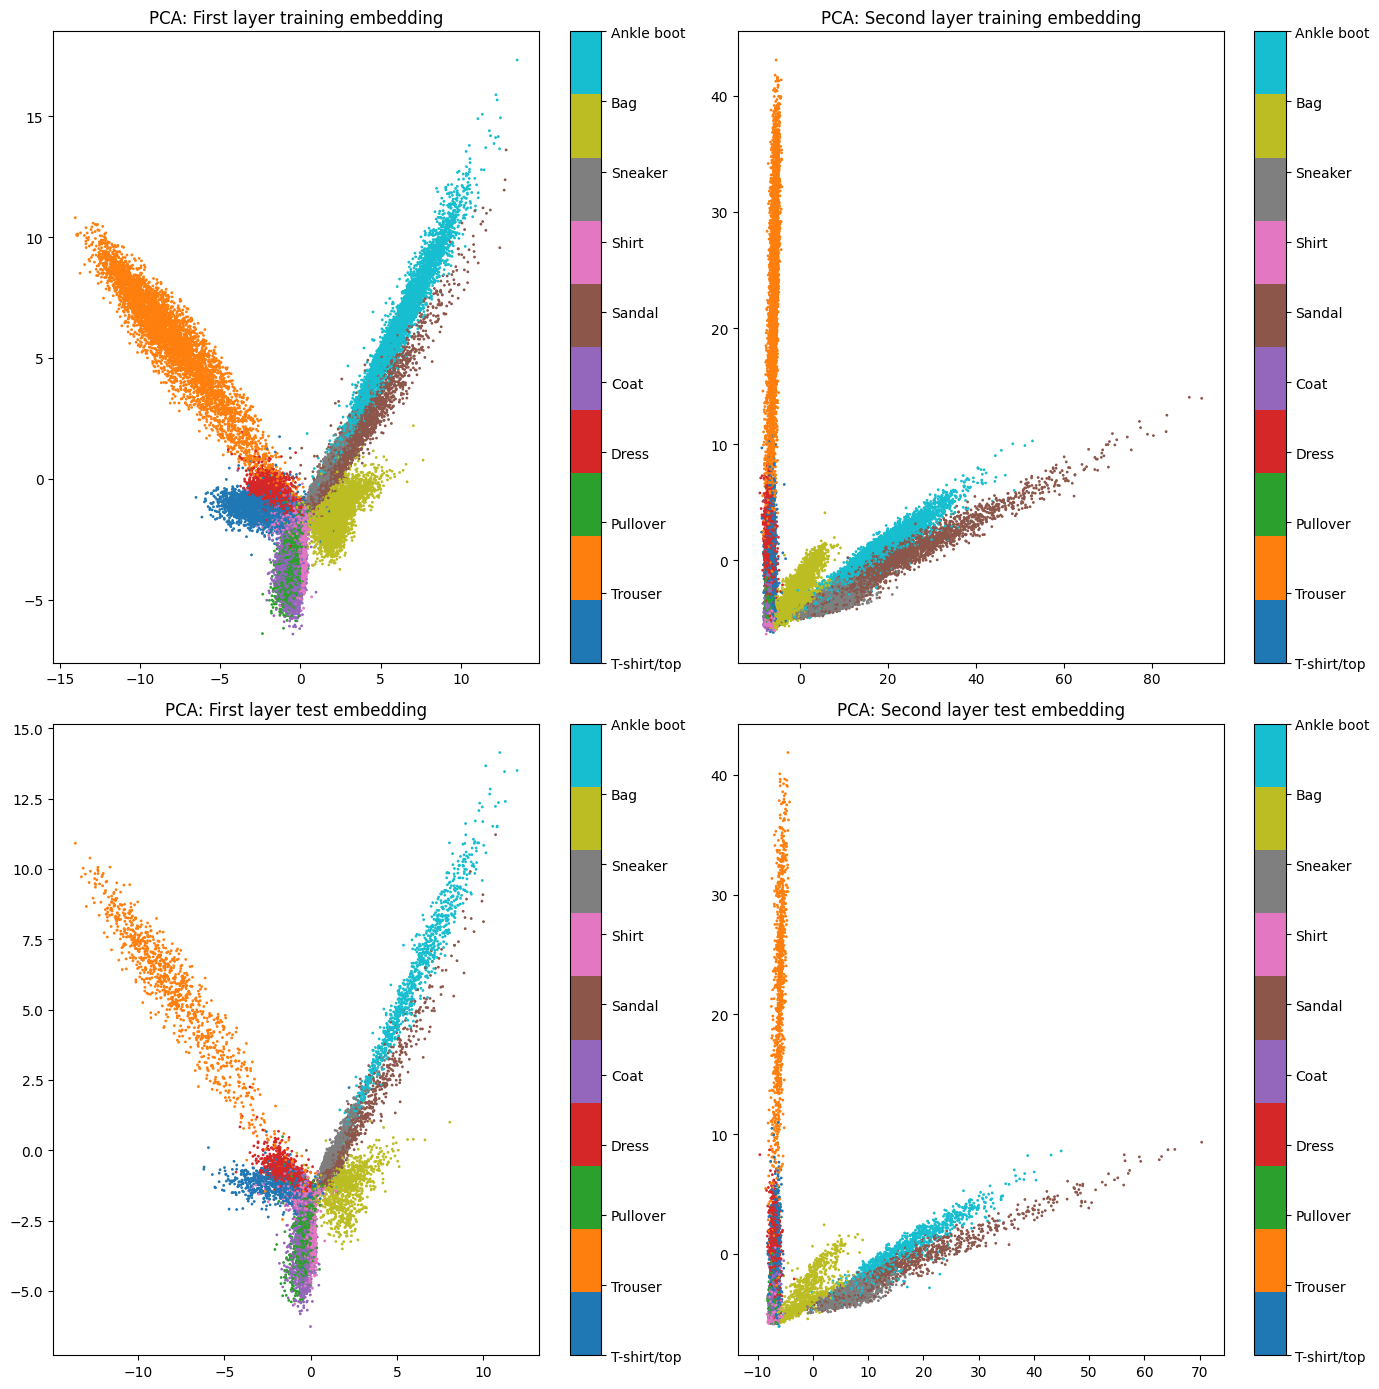

/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yt

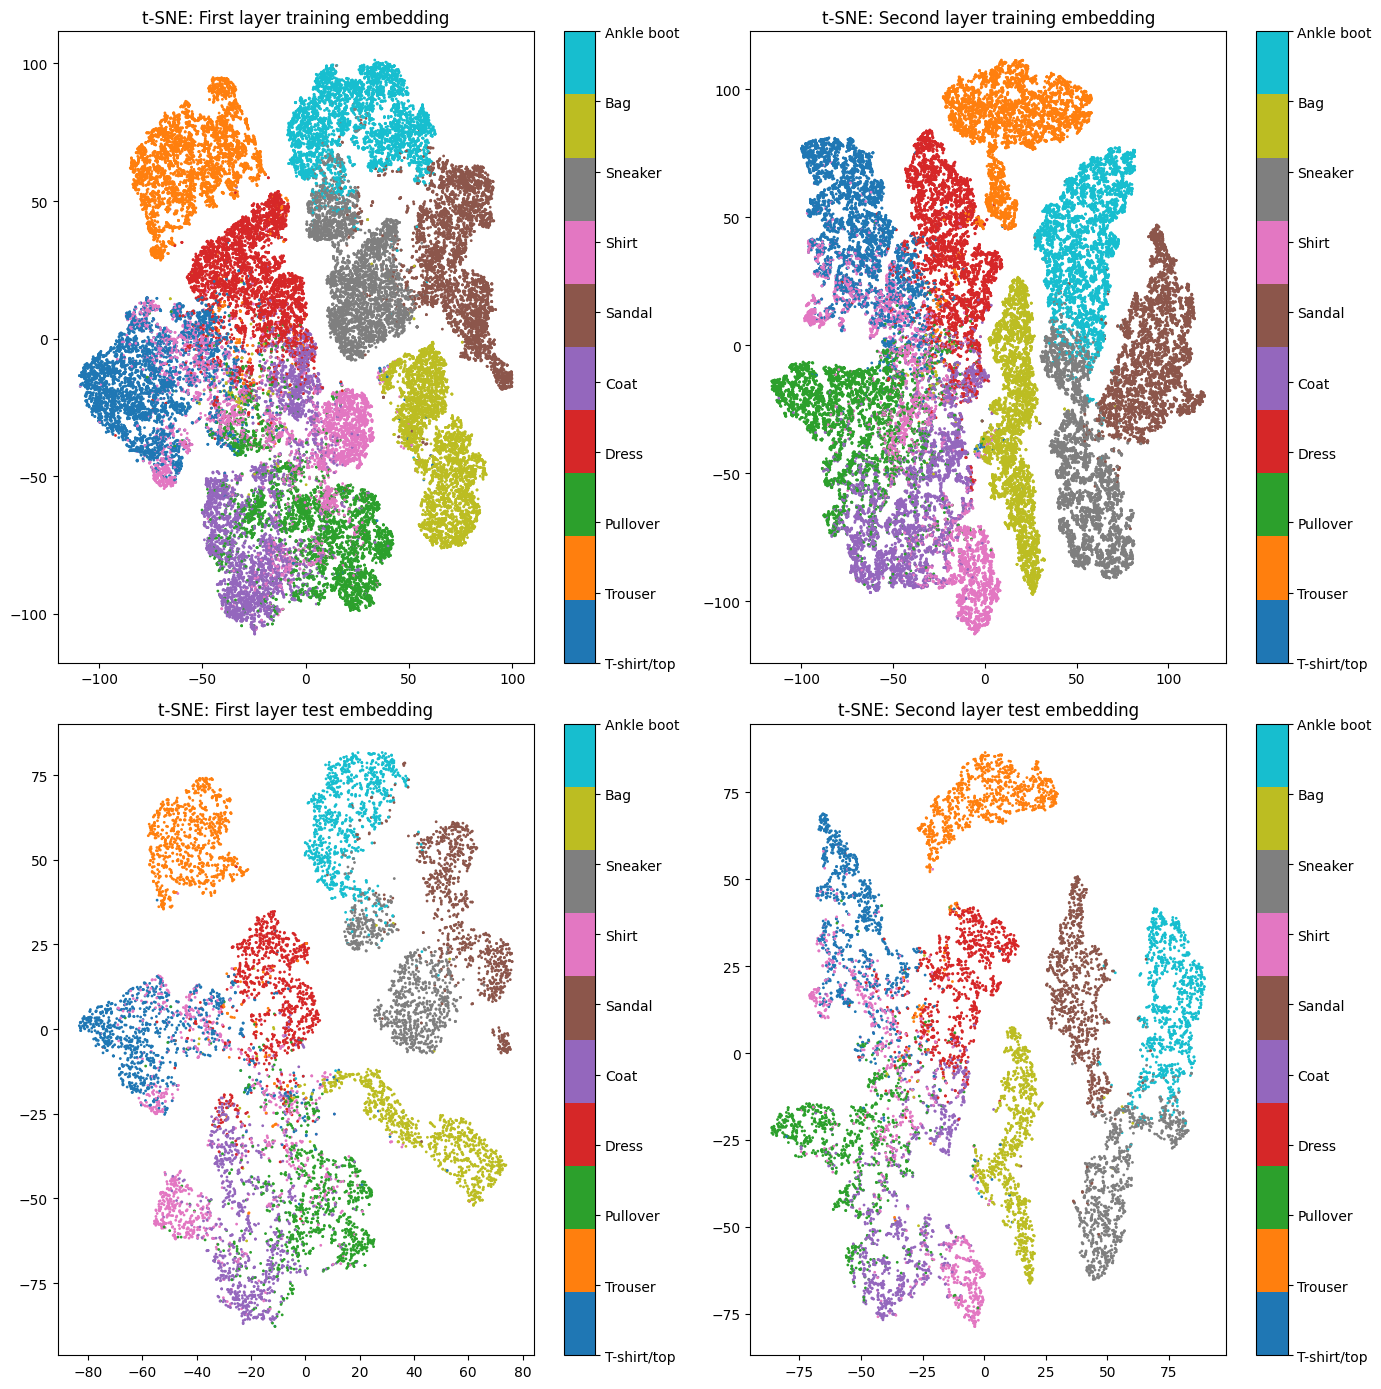

/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(fmnist_mapped_labels)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_87509/729770094.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yt

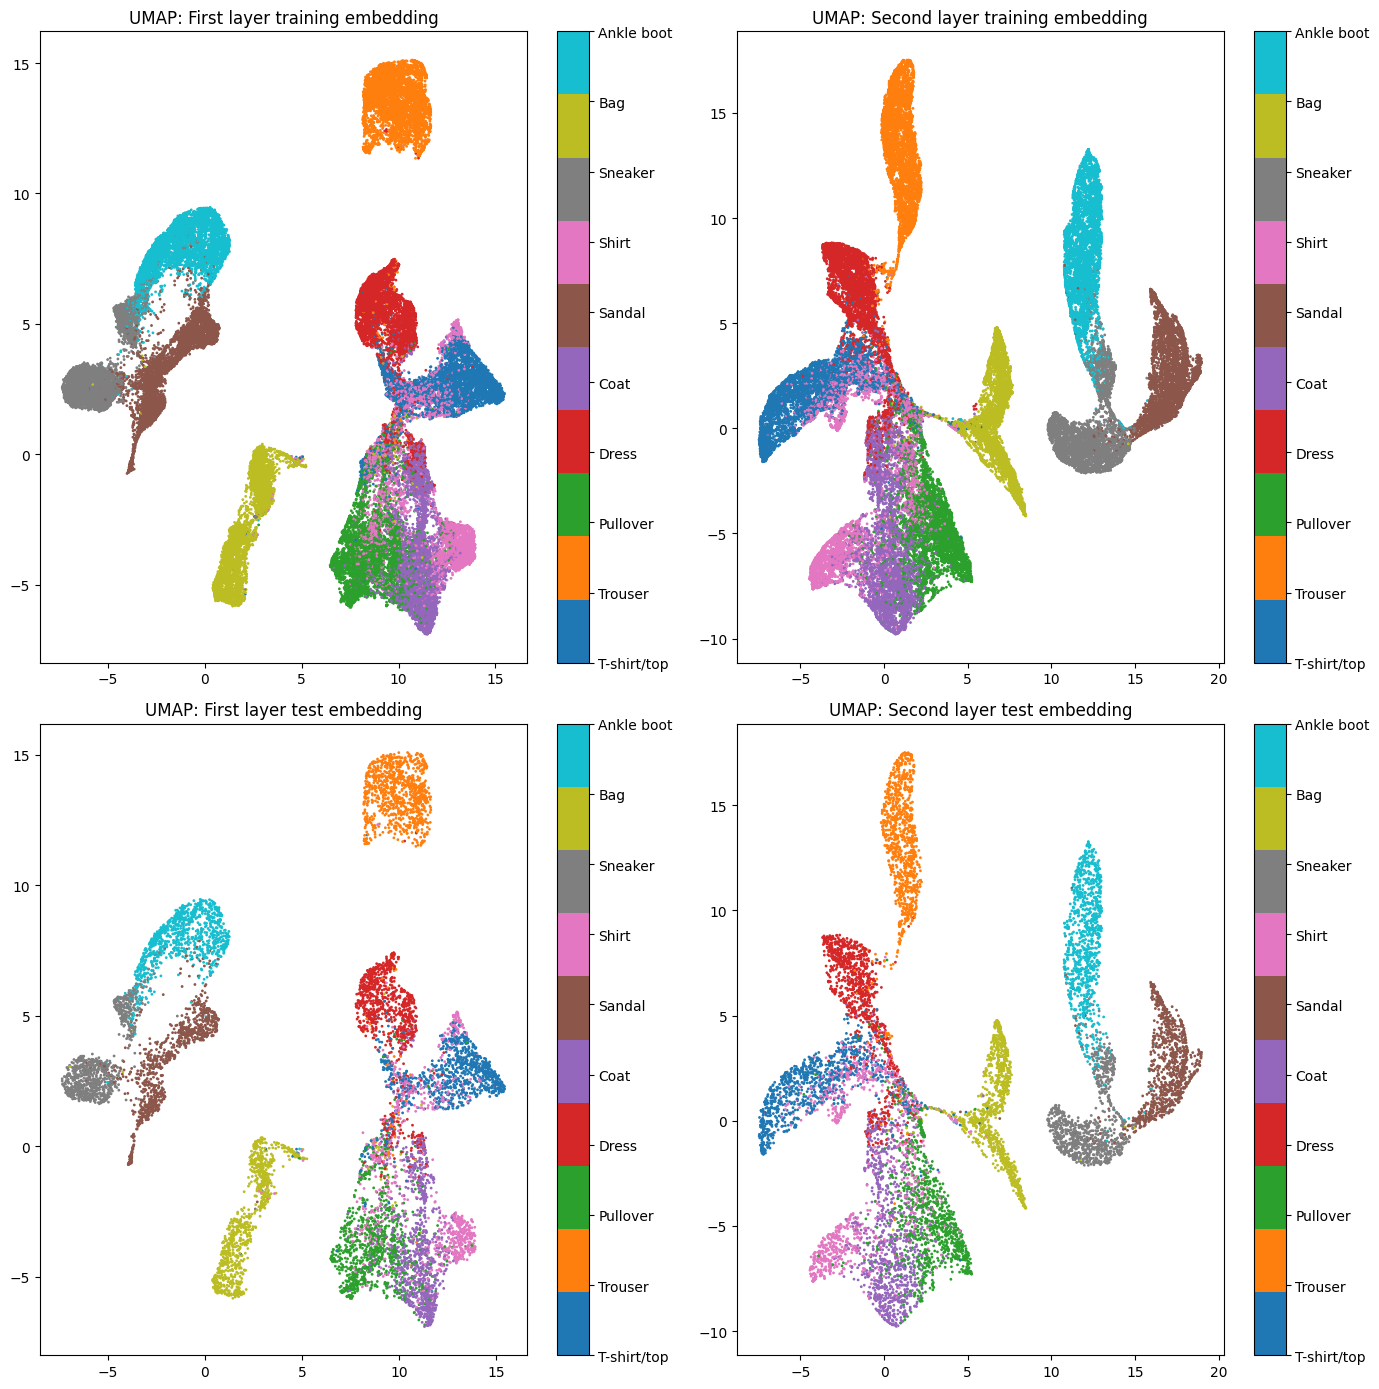

In [62]:
for method, config in methods.items():
    layer1_train_embedding = config["layer1_train_embedding"]
    layer1_test_embedding = config["layer1_test_embedding"]
    layer2_train_embedding = config["layer2_train_embedding"]
    layer2_test_embedding = config["layer2_test_embedding"]
    visualize_layers(layer1_train_embedding, layer1_test_embedding, layer2_train_embedding, layer2_test_embedding, method)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
# Define a function to evaluate KNN on different embeddings
def evaluate_knn(X_train_embedded, X_test_embedded, y_train, y_test, n_neighbors_list):
    results = []
    for n_neighbors in n_neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_embedded, y_train)
        y_pred = knn.predict(X_test_embedded)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((n_neighbors, accuracy))
        print(f"n_neighbors={n_neighbors}, Accuracy: {accuracy:.4f}")
    return results
 
# Convert Y_train and Y_test to class labels
y_train = np.argmax(Y_train, axis=1)
y_test = np.argmax(Y_test, axis=1)
 
# Test KNN with different numbers of neighbors
n_neighbors_list = [3, 5, 10]
 
print("Raw Data UMAP Embeddings:")
raw_results = evaluate_knn(X_train_umap, X_test_umap, y_train, y_test, n_neighbors_list)
 
# Repeat for hidden layer 1 and hidden layer 2 embeddings

Raw Data UMAP Embeddings:
n_neighbors=3, Accuracy: 0.7412
n_neighbors=5, Accuracy: 0.7580
n_neighbors=10, Accuracy: 0.7655


In [17]:
inputs = ["Raw Data", "First Hidden Layer", "Second Hidden Layer"]
X_test_pca = pca.transform(X_test)
X_test_tsne = pca.fit_transform(X_test)

for method, config in methods.items():
    if method == "PCA":
        config["train_raw"] = X_train_pca
        config["test_raw"] = X_test_pca
    elif method == 't-SNE':
        config["train_raw"] = X_train_tsne
        config["test_raw"] = X_test_tsne
    elif method == 'UMAP':
        config["train_raw"] = X_train_umap
        config["test_raw"] = X_test_umap

In [18]:
for method,config in methods.items():
    for input in inputs:
        print(f"\n{input} {method} Embedding")
        
        if input == 'Raw Data':
            X_train_embedded = config['train_raw'] 
            X_test_embedded =  config['test_raw']
        elif input == 'First Hidden Layer':    
            X_train_embedded = config['layer1_train_embedding'] 
            X_test_embedded =  config['layer1_test_embedding']
        else:
            X_train_embedded = config['layer2_train_embedding'] 
            X_test_embedded =  config['layer2_test_embedding']
        
        evaluate_knn(X_train_embedded, X_test_embedded, y_train, y_test, n_neighbors_list)


Raw Data PCA Embedding
n_neighbors=3, Accuracy: 0.4825
n_neighbors=5, Accuracy: 0.5027
n_neighbors=10, Accuracy: 0.5335

First Hidden Layer PCA Embedding
n_neighbors=3, Accuracy: 0.8732
n_neighbors=5, Accuracy: 0.8793
n_neighbors=10, Accuracy: 0.8783

Second Hidden Layer PCA Embedding
n_neighbors=3, Accuracy: 0.8696
n_neighbors=5, Accuracy: 0.8726
n_neighbors=10, Accuracy: 0.8770

Raw Data t-SNE Embedding
n_neighbors=3, Accuracy: 0.1170
n_neighbors=5, Accuracy: 0.1295
n_neighbors=10, Accuracy: 0.1373

First Hidden Layer t-SNE Embedding
n_neighbors=3, Accuracy: 0.6029
n_neighbors=5, Accuracy: 0.6101
n_neighbors=10, Accuracy: 0.6160

Second Hidden Layer t-SNE Embedding
n_neighbors=3, Accuracy: 0.6057
n_neighbors=5, Accuracy: 0.6148
n_neighbors=10, Accuracy: 0.6245

Raw Data UMAP Embedding
n_neighbors=3, Accuracy: 0.7412
n_neighbors=5, Accuracy: 0.7580
n_neighbors=10, Accuracy: 0.7655

First Hidden Layer UMAP Embedding
n_neighbors=3, Accuracy: 0.8444
n_neighbors=5, Accuracy: 0.8529
n_nei

The visualization of hidden layer activations shows better clustering compared to raw data visualization. <br>
The second hidden layer activations generally show clearer class separation than the first hidden layer.<br>
Classification accuracy generally improves when using hidden layer activations compared to raw data, with the later layer typically providing better performance.


## Outcomes
1. Compare the visualization results between MNIST and Fashion-MNIST:
- Class boundaries are clearer in the MNIST dataset
- Compared to raw data, hidden layer activations provide better separation
- Most easily confused classes in Fashion Mnist are Coats with Pullorvers and Shirts
2. Compare classification performance:
- Accuracy measure is sligltly better on MNIST than on Fashion-MNIST, but visually, the separation is much clearer in MNIST
- Using hidden layer activations provide a similar boost in performance for Fashion-MNIST as it did for MNIST
- Classes that benefit the most from using hidden layer activations for classification are: T-shirt/top, Dress, Pullover, Shirt, Coat, because they were mixed togerther in the raw data
## Discussion Questions
- How does the neural network’s representation of fashion items differ from its representation of digits?
    - Both look quite similar after reducing them to only 2 dimensions, however the representation of digits is more organized and well separated
- What might explain any differences in visualization clarity or classification performance between the two datasets?
    - some types of clothing are more similar to each other than handwritten digits
- Which dimensionality reduction technique works best for Fashion-MNIST, and is this the same as what worked best for MNIST?
    - According to the measures, the dimensionality reduction technique that worked best both for MNIST and Fashion-MNIST is PCA, but looking at the visualization, UMAP seemes to have better separated the classes. For both datasets t-SNE did worse, both visually and by the measure.
- How might you modify the neural network architecture to improve visualization or classification for Fashion-MNIST specifically?
    - Use deeper convolutional layers, because the Fashion-MNIST dataset has more complex textures than MNIST